

## Project - Advertising 

### • Infer relationship between sales and the three media budgets: TV, Radio and Newspaper.

## Project Steps Followed


### Step 1 : Reading and understanding of data

### Step 2 : Data cleaning and Preparation

### Step 3 : Visualizing the data

### Step 4 : Deriving new features

### Step 5 : Train-Test Split and feature scaling

### Step 6 : Model Building



# Step 1 : Reading and understanding of data

In [2]:
# libraries for dataframes & array handling
import pandas as pd
import numpy as np

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
sns.set_theme(style='darkgrid', palette='inferno')

# library to ignore warnings that arise during visualizations
import warnings
warnings.filterwarnings('ignore')

In [3]:
# SKLEARN CLASSES & LIBRARIES

# importing train test split & GridSearchCV (for performing grid search on various model parmeters)
from sklearn.model_selection import train_test_split, GridSearchCV

# import StandarScaler for data Standardization
from sklearn.preprocessing import StandardScaler

# importing linear regression, polynomial regression, Regulariation classes (Ridge, Lasso, ElasticNet)
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

# importing model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, SCORERS

In [4]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

In [5]:
# renaming all the columns for ease of use
df.rename({'TV Ad Budget ($)':'TV',
           'Radio Ad Budget ($)':'Radio',
           'Newspaper Ad Budget ($)':'Newspaper',
           'Sales ($)':'Sales'},axis=1, inplace=True)

In [6]:
# getting basic data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# getting basic statisics for our data, as all the columns are of numerical category
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# checking shape of dataframe
df.shape

(200, 5)

# Step 2 : Data cleaning and Preparation

In [9]:
# checking for null vlaues
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
df['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

# Step 3 : Visualizing the data

#### As we have to predict sales based on advertisment budget on TV, Radio & Newspaper, we check correlation between variables and sales column
- High correlation between TV & Sales
- moderate correlation between Radio & Sales
- very low correlation between Newspaper & sales

- data seem to be sort of normally distributed

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


<Axes: >

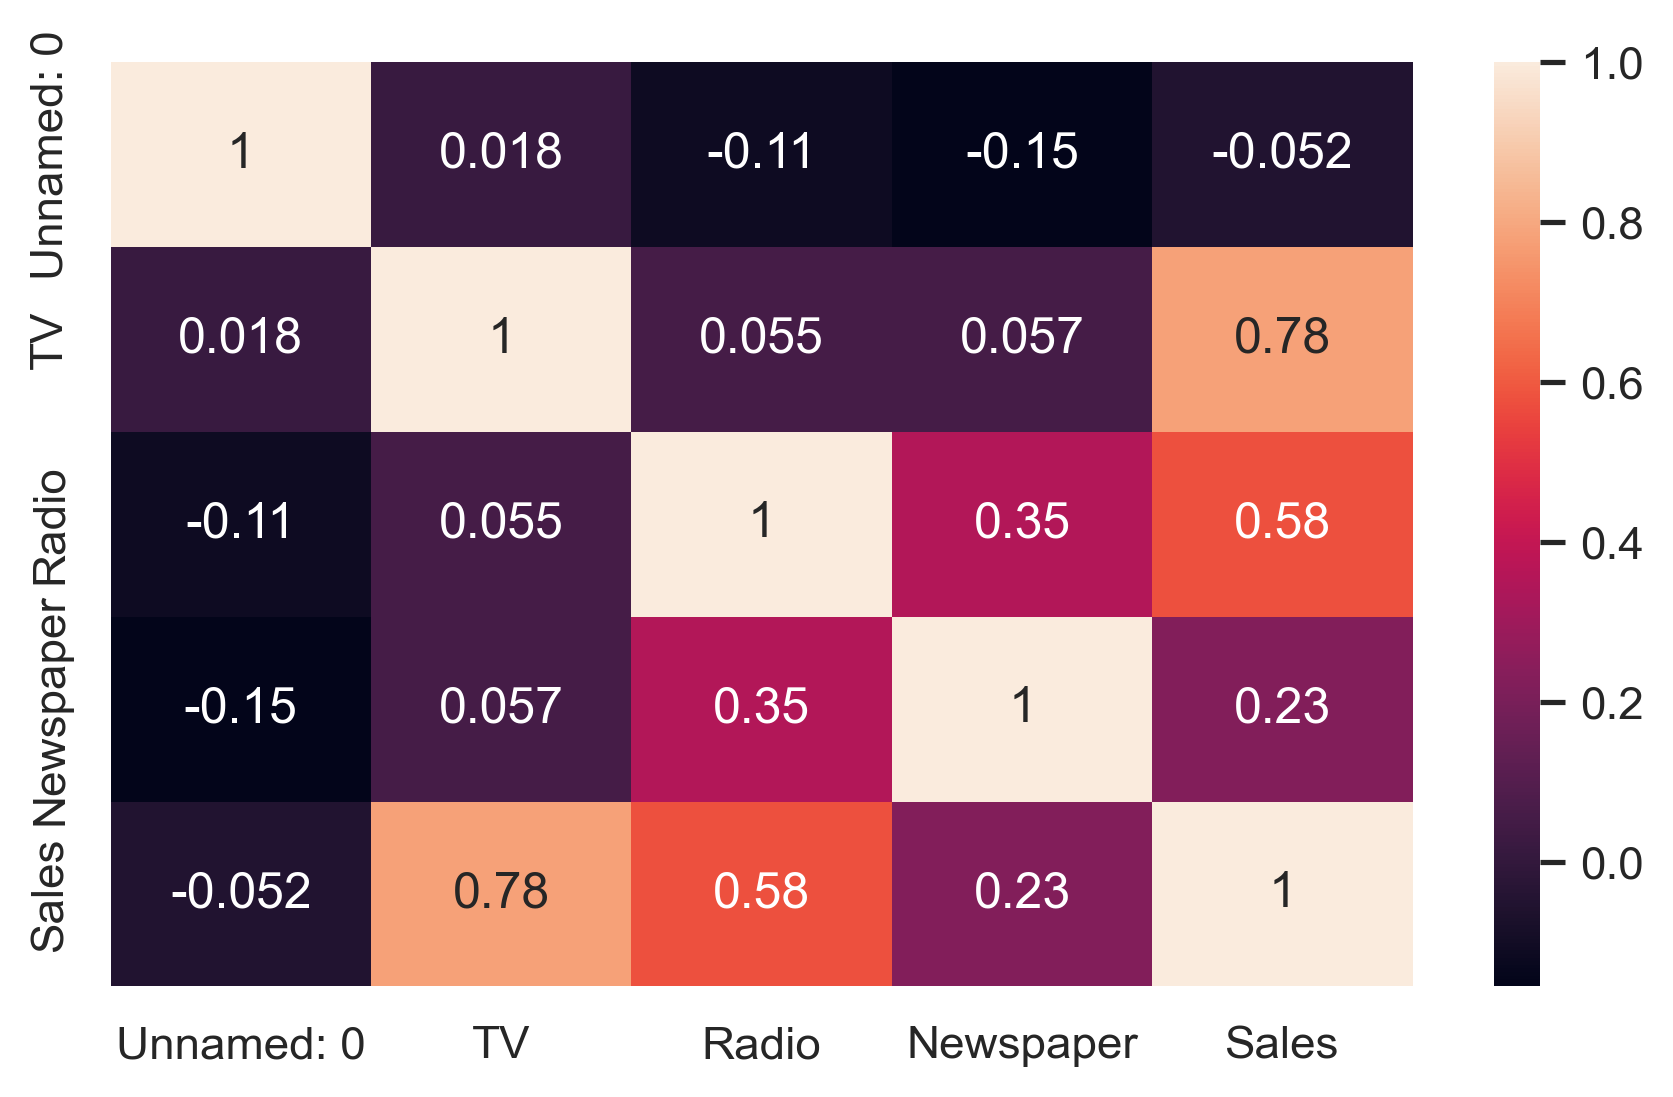

In [11]:
# checking for correlation
print(df.corr())
sns.heatmap(df.corr(),annot=True)

# Step 4 : Deriving new features

In [12]:
x = df[['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']]
y= df['Sales']

In [13]:
x

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Step 5 : Train-Test Split and feature scaling

In [15]:
x.shape

(200, 5)

In [16]:
y.shape

(200,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)


# Step 6 : Model Building



## Ridge regression

In [19]:
# scaling data 
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [20]:
# checking various scoring metrics
# we can use these scoring keys to check for best performing model based on specified scores
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

- in ridgeCV we set various values of alplha and the model runs on all the passed values of aplha and fits on the best 
- performing aplha value based on passed scoring method

- Generally ridgecv model assumes that higher the score better the model, but for mean absolute error - lower value is better
- so we use neg_mean_absolute_error as scoring method to get 1-mean_absolute_error which follows property of mean aboslute error

In [21]:
# creating ridge model & setting its hyperparameters
ridge_model = RidgeCV(alphas=(0.1,1,10),scoring='neg_mean_absolute_error', cv = 5)

In [22]:
ridge_model.fit(scaled_x_train, y_train)

RidgeCV(alphas=(0.1, 1, 10), cv=5, scoring='neg_mean_absolute_error')

In [23]:
# best performing alpha value
ridge_model.alpha_

0.1

In [24]:
# predict method automatically fit predictions on best performing parameters
ridge_predict = ridge_model.predict(scaled_x_test)

In [25]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

ridge_MAE = mean_absolute_error(y_test, ridge_predict)
ridge_MSE = mean_squared_error(y_test, ridge_predict)
ridge_RMSE = np.sqrt(mean_squared_error(y_test, ridge_predict)) # root mean sqaured error
ridge_R2 = r2_score(y_test, ridge_predict)

print('Mean absolute error for Ridge regression ',ridge_MAE)
print('Mean squared error for Ridge regression ',ridge_MSE)
print('Root Mean Squared error for Ridge regression ',ridge_RMSE)
print('Accuracy for Ridge regression ',ridge_R2*100)

Mean absolute error for Ridge regression  0.011273562756269983
Mean squared error for Ridge regression  0.00021114913986119963
Root Mean Squared error for Ridge regression  0.014530971745248134
Accuracy for Ridge regression  99.99922669046454
